# **Análisis de pruebas PISA**
Segunda Entrega: Sábado 28 de Septiembre de 2024

**Integrantes del grupo (Grupo 17):**
- Bas Peralta, Benjamín
- Tossolini, Lucas

# **Objetivos**

Habiendo hecho un análisis exploratorio exhaustivo en la primera entrega, los objetivos a lograr a partir de esta base de datos serán dos, ambos relacionados con el desempeño de los alumnos sobre las distintas materias:

* Objetivo **explicatorio**: Entender cuáles son los principales factores (socioeconómicos, de infraestructura, institucionales, regionales, etcétera) de cada alumno que influyen sobre el desempeño en las distintas materias.
* Objetivo **predictivo**: Predecir, en base a los factores antes mencionados, cuál sera el desempeño de un alumno en cada una de las materias.

Consideramos que alcanzar estos objetivos podría ayudar (junto con otras técnicas) a implementar políticas públicas focalizadas en diferentes sectores cuyo fin sea mejorar el nivel de desempeño de los alumnos.

Teniendo estas metas en mente, nos surgió la siguiente pregunta:
Si bien contamos con las "notas" de Matemática, Lengua y Ciencia de cada alumno, ¿qué signfican estos números? ¿cómo podemos saber si a un alumno le fue bien o le fue mal? ¿será mejor basar los análisis en el número de la nota o poner un criterio de "aprobación" en cada materia? Para responder estas preguntas, recurrimos a la documentación oficial de las pruebas PISA: [Resultados de PISA 2018 (Volumen I)](https://www.oecd-ilibrary.org/education/pisa-2018-results-volume-i/summary/spanish_a89c90e1-es)

En 2018 en Argentina las pruebas PISA, se hicieron con papel y lápiz, por lo que debemos referirnos al siguiente documento: [PISA 2009 Results: What Students Know and Can Do](https://www.oecd-ilibrary.org/docserver/9789264091450-en.pdf?expires=1725112287&id=id&accname=guest&checksum=393B7204522115E8F5E8C414441D9775). Según este, la escala de notas en cada materia se divide en distintos niveles de competencia, que van del 1 al 6. PISA suele utilizar como **"nivel base de competencia"** el nivel 2.

Las preguntas que se realizan en las pruebas PISA se distribuyen en los mismos niveles. Es importante saber que el nivel en el que se localiza el puntaje de un alumno dentro de los niveles que se detallarán a continuación representa el nivel más alto para el cual se espera que el alumno responda correctamente la mayoría de preguntas de ese nivel seleccionadas aleatoriamente.

**Lengua**

| Nivel | Puntaje mínimo |
| :---: | :---: |
| 1b  | 262 |
| 1a  | 335 |
| 2   | 407 |
| 3   | 480 |
| 4   | 553 |
| 5   | 626 |
| 6   | 698 |

El nivel 2 puede ser considerado como el nivel básico de competencia, en el cual los estudiantes comienzan a demostrar la capacidad de lectura y alfabetización que les permitirán participar efectiva y productivamente en su vida diaria. Las tareas en este nivel incluyen, entre otras: localizar piezas de información, reconocer la idea principal de un texto, entender relaciones, y hacer inferencias de bajo nivel.

**Matemática**

| Nivel | Puntaje mínimo |
| :---: | :---: |
| 1   | 358 |
| 2   | 420 |
| 3   | 482 |
| 4   | 545 |
| 5   | 607 |
| 6   | 669 |

El nivel 2 puede ser considerado como el nivel básico de competencia, en el cual los estudiantes comienzan a demostrar el tipo de habilidades que les permiten utilizar las matemáticas en formas que son consideradas fundamentales para su desarrollo futuro. Alumnos situados en el nivel 2 pueden interpretar y reconocer situaciones en contextos que requieren no más que inferencia directa. Pueden extraer información relevante desde una sola fuente y hacer uso de un modo representativo, pueden utilizar algoritmos, formulas y procedimientos básicos.

**Ciencia**

| Nivel | Puntaje mínimo |
| :---: | :---: |
| 1 | 335 |
| 2 | 409 |
| 3 | 484 |
| 4 | 559 |
| 5 | 633 |
| 6 | 708 |

El nivel 2 puede ser considerado como el nivel básico de competencia, en el cual los estudiantes comienzan a demostrar competencias científicas que les permitirán participar activamente en situaciones relacionadas con la ciencia y la tecnología. Alumnos situados en el nivel 2 tienen conocimiento científico adecuado para proveer posibles explicaciones en contextos familiares o llegar a conclusiones en investigaciones simples. Son capaces de razonamiento directo y de hacer interpretaciones literales de los resultados de problemas tecnológicos.


Cabe aclarar que en el documento citado se encuentra una descripción detallada de lo que signfica estar en cada nivel.

# **Índice**

# **Instalación de librerias faltantes**


In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00


# **Importación de librerías**

In [ ]:
import gdown
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns

from imblearn.over_sampling import SMOTE

from linearmodels.iv import IV2SLS

from scipy import stats
from scipy.stats import ttest_ind, shapiro
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, fcluster

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, silhouette_score, accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale

from statsmodels.stats.outliers_influence import reset_ramsey, variance_inflation_factor
from statsmodels.stats.diagnostic import linear_reset

from tabulate import tabulate

import plotly.express as px
import plotly.graph_objs as go

# **Carga de datos**

In [ ]:
file_id = "1-2rjBgeoVG6G1ysY_dEWk8fGisE2_V44"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url=url, output="pisa.csv", quiet=False)
df = pd.read_csv("pisa.csv")

Downloading...
From (original): https://drive.google.com/uc?id=1-2rjBgeoVG6G1ysY_dEWk8fGisE2_V44
From (redirected): https://drive.google.com/uc?id=1-2rjBgeoVG6G1ysY_dEWk8fGisE2_V44&confirm=t&uuid=564bc424-08ae-418b-a120-f5a68bf54a59
To: /content/pisa.csv
100%|██████████| 179M/179M [00:02<00:00, 67.8MB/s]


# **Carga de codificaciones**

In [ ]:
# Codificaciones de alumnos
file_id = "1-2OJKrrVvE2PQ4xIIWe63hWuhBA-XUC2"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url=url, output="codificacion_alumnos.csv", quiet=False)
stu_encoding = pd.read_csv("codificacion_alumnos.csv")
stu_encoding.drop(columns=['Unnamed: 0'], inplace=True)

Downloading...
From: https://drive.google.com/uc?id=1-2OJKrrVvE2PQ4xIIWe63hWuhBA-XUC2
To: /content/codificacion_alumnos.csv
100%|██████████| 25.6k/25.6k [00:00<00:00, 34.5MB/s]


In [ ]:
stu_encoding.drop_duplicates(subset='NAME').reset_index(drop=True)

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,CNTSCHID,Intl. School ID,NUM,8.0,3.0000,800002-98300806,NaN,NaN,NaN,NaN
1,CNTSTUID,Intl. Student ID,NUM,8.0,4.0000,800001-98329122,NaN,NaN,NaN,NaN
2,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,$7.,8.0000,800001-98329122,NaN,NaN,NaN,NaN
3,GENDER,Student (Standardized) Gender,NUM,1.0,18.0000,1-2,NaN,NaN,NaN,NaN
4,AGE,Age,NUM,7.2,835.0000,15.08-16.33,NaN,NaN,NaN,NaN
5,PARED,Index highest parental education in years of s...,NUM,7.2,847.0000,3-18,NaN,NaN,NaN,NaN
6,HISEI,Index highest parental occupational status,NUM,6.2,854.0000,11.01-88.96,NaN,NaN,NaN,NaN
7,IMMIG,Index Immigration status,NUM,1.0,860.0000,1-3,NaN,NaN,NaN,NaN
8,DURECEC,Duration in early childhood education and care,NUM,2.0,861.0000,0-8,NaN,NaN,NaN,NaN
9,REPEAT,Grade Repetition,NUM,1.0,862.0000,0-1,NaN,NaN,NaN,NaN


In [ ]:
# Codificaciones de escuelas
file_id = "1--vxX46klBFjxovIq0NSbopr8cIcV5Pf"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url=url, output="codificacion_escuelas.csv", quiet=False)
sch_encoding = pd.read_csv("codificacion_escuelas.csv")
sch_encoding.drop(columns=['Unnamed: 0'], inplace=True)

Downloading...
From: https://drive.google.com/uc?id=1--vxX46klBFjxovIq0NSbopr8cIcV5Pf
To: /content/codificacion_escuelas.csv
100%|██████████| 12.0k/12.0k [00:00<00:00, 21.7MB/s]


In [ ]:
sch_encoding.drop_duplicates(subset='NAME').reset_index(drop=True)

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
0,CNTSCHID,Intl. School ID,NUM,8.0,3,800002-98300806,NaN,NaN,NaN,NaN
1,PRIVATESCH,School type derived from sampling information;...,CHAR,$7.,175,1-2,NaN,NaN,NaN,NaN
2,SCHLTYPE,School Ownership,NUM,1.0,176,1-3,NaN,NaN,NaN,NaN
3,STRATIO,Student-Teacher ratio,NUM,8.4,177,1-100,NaN,NaN,NaN,NaN
4,SCHSIZE,School Size (Sum),NUM,8.0,178,1-13400,NaN,NaN,NaN,NaN
5,RATCMP1,Number of available computers per student at m...,NUM,8.4,179,0-25,NaN,NaN,NaN,NaN
6,RATCMP2,Proportion of available computers that are con...,NUM,8.4,180,0-1,NaN,NaN,NaN,NaN
7,TOTAT,Total number of all teachers at school,NUM,7.1,181,0-3334.5,NaN,NaN,NaN,NaN
8,PROATCE,Index proportion of all teachers fully certified,NUM,7.4,182,0-1,NaN,NaN,NaN,NaN
9,PROAT5AB,Index proportion of all teachers ISCED LEVEL 5...,NUM,7.4,183,0-1,NaN,NaN,NaN,NaN


# **Funciones auxiliares**

In [ ]:
def df_correlation(df, heat_map=False, annot=False):
    """
    Calcula la matriz de correlación de un DataFrame y, opcionalmente,
    la muestra como un mapa de calor.

    Args:
        df: DataFrame del cual se calculará la correlación.
        heat_map: Si es True, se mostrará un mapa de calor de la correlación.
                  Por defecto es False.
        annot: Si es True, se mostrarán los valores de correlación en el mapa
               de calor. Solo tiene efecto si heat_map es True.
               Por defecto es False.

    Returns:
        DataFrame: Matriz de correlación del DataFrame de entrada.
    """
    correlation = df.corr()
    if heat_map:
        fig, ax = plt.subplots(figsize = (8, 6))
        fig.suptitle("Correlación simple entre variables", fontsize=18, fontweight="bold", x=0.43)
        sns.heatmap(correlation, ax=ax, cmap="twilight_shifted", annot=annot)
        plt.subplots_adjust(top=0.85)
        plt.show()
    return correlation

def mean_difference_test_and_conclusion(group_a, group_b, values, index, alpha=0.05):
    """
    Realiza una prueba t de Student para la diferencia de medias entre dos grupos
    y presenta una conclusión basada en el valor p.

    Args:
        group_a (pd.DataFrame or pd.Series): Primer grupo de datos.
        group_b (pd.DataFrame or pd.Series): Segundo grupo de datos.
        values (list): Lista de nombres de columnas (variables) a comparar.
        index (str): Descripción del índice o criterio de agrupación.
        alpha (float, optional): Nivel de significancia para la prueba. Por defecto 0.05.

    Returns:
        None. Imprime los resultados de la prueba t y la conclusión.
    """
    for value in values:
        print(f"Diferencia de medias con respecto a {index} en {value}")

        # Realiza el test t de Student
        t_stat, p_value = ttest_ind(group_a[value], group_b[value], equal_var=False)

        print(f"Estadístico t: {t_stat:.4f}")
        print(f"Valor p: {p_value:.4f}")

        if p_value < alpha:
            print(
                "\nRechazamos la hipótesis nula. Las medias son "
                "significativamente diferentes."
            )
        else:
            print(
                "\nNo podemos rechazar la hipótesis nula. No hay evidencia "
                "suficiente para afirmar que las medias son diferentes."
            )
        print("------------------------------------------------------------------------------")

In [ ]:
class MultivariateRegression():

    def __init__(
        self,
        X: list[str],
        Y: list[str],
        df: pd.DataFrame,
        scaleX=False,
        scaleY=False
    ):
        self.df = df.copy()
        self.X = self.df[X]
        self.Y = self.df[Y]
        if scaleX:
            self.X = StandardScaler().fit_transform(self.X)
            self.X = pd.DataFrame(self.X, columns=X)
        if scaleY:
            self.Y = StandardScaler().fit_transform(self.Y)
            self.Y = pd.DataFrame(self.Y, columns=Y)
        self.model = sm.OLS(self.Y, sm.add_constant(self.X))
        self.results = self.model.fit()
        self.residues = self.results.resid

    def __repr__(self):
        return str(self.results.summary())

    def __str__(self):
        return str(self.results.summary())

    def get_coefficents(self):
        return self.results.params

    def get_r_squared(self, adjusted=False):
        if not adjusted:
            return self.results.rsquared
        return self.results.rsquared_adj

    def get_residues(self):
        return self.results.resid

    def predict(self):
        return self.results.predict()

    def residues_vs_fitted_plot(self):
        resiudes = self.residues
        fitted_values = self.results.predict()
        fig, ax = plt.subplots(figsize = (8,6))
        fig.suptitle("Residuos vs. valores ajustados", fontsize=18, fontweight="bold")
        ax.scatter(fitted_values, resiudes, color = "darkblue")
        ax.set_xlabel("Valores ajustados", fontsize=15)
        ax.set_ylabel("Residuos", fontsize=15)
        ax.tick_params(labelsize=13)
        plt.show()

    def ramsey_test(self, degree=3):
        results = linear_reset(self.results, power=degree, use_f=True)
        fvalue = results.fvalue
        pvalue = results.pvalue
        df_denom = results.df_denom
        df_num = results.df_num
        return tabulate(
            [[fvalue, pvalue, df_denom, df_num, degree]],
            headers=["F-value", "p-value", "df_denom", "df_num", "degree"],
            tablefmt="mixed_grid"
        )

    def rainbow_test(self):
        results = sms.linear_rainbow(self.results)
        return tabulate(
            [results],
            headers=["Estadístico F", "p-valor"],
            tablefmt="mixed_grid"
        )

    def correlation(self, heat_map=False):
        df = pd.concat([self.Y, self.X], axis=1)
        return df_correlation(df, heat_map)

    def VIF(self, threshold=10):
        exog = sm.add_constant(self.X)
        VIFS = [variance_inflation_factor(exog.values, i) for i in range(len(exog.columns[1:]))]
        df = pd.DataFrame({
            'Variables': exog.columns[1:],
            'VIF': VIFS,
            f'VIF >= {threshold}': [vif >= threshold for vif in VIFS]
        })
        return df

    def residues_mean(self, plot=False):
        if plot:
            fig, ax = plt.subplots(figsize=(15,5))
            fig.suptitle("Residuos", fontweight="bold")
            ax.plot(self.residues, color="darkblue")
            ax.set_xlabel("Observaciones")
            ax.set_ylabel("Residuos")
            ax.tick_params(labelsize=14)
            plt.axhline(y=self.residues.mean(), color="red")
            plt.axhline(y=0, color="orange", linestyle=':')
            plt.show()
        return np.mean(self.residues)

    def residues_normality_tests(self, tests: list[str]):
        funcs = {
            "jarque_bera": sms.jarque_bera,
            "omnibus": sms.omni_normtest,
            "kolmogorov-smirnov": sms.diagnostic.kstest_normal,
            "shapiro": shapiro
        }
        indices = {
            "jarque_bera": ["Jarque-Bera", "p-valor", "Asimetría", "Curtosis"],
            "omnibus": ["Estadístico K2", "p-valor"],
            "kolmogorov-smirnov": ["Estadístico KS", "p-valor"],
            "shapiro": ["Estadístico SW", "p-valor"]
        }
        results = {}
        for test in tests:
            test_results = funcs[test](self.residues)
            test_results = pd.Series(test_results, index=indices[test])
            results[test] = test_results.rename("Value")
        return results

    def residues_qq_plot(self):
        fig, ax = plt.subplots(figsize = (8,6))
        fig.suptitle("Q-Q plot de normalidad", size=20, fontweight="bold")
        sm.qqplot(self.residues, ax=ax, line="s")
        ax.set_xlabel("Cuantiles teóricos", fontsize=14)
        ax.set_ylabel("Cuantiles muestrales", fontsize=14)
        plt.show()

In [ ]:
def scatter_plot_3d(df, x, y, z, var, groups_colors):
    """
    Esta función crea un gráfico de dispersión 3D utilizando Plotly para visualizar
    la relación entre tres variables, con puntos coloreados según una variable
    de agrupación.

    Args:
        df: DataFrame que contiene los datos.
        x: Nombre de la columna a utilizar para el eje x.
        y: Nombre de la columna a utilizar para el eje y.
        z: Nombre de la columna a utilizar para el eje z.
        var: Nombre de la columna que contiene la variable de agrupación.
        groups_colors: Diccionario que mapea los valores de los grupos a los colores.

    Returns:
        None. Muestra el gráfico utilizando Plotly.
    """
    traces = []
    for group, color in groups_colors.items():
        group_data = df[df[var] == group]
        trace = go.Scatter3d(
            x=group_data[x],
            y=group_data[y],
            z=group_data[z],
            mode='markers',
            marker=dict(
                size=5,
                color=color,
                line=dict(width=1, color='grey')
            ),
            name=f'Grupo {group}'
        )
        traces.append(trace)
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title=X, range=[df[X].min() - 1, df[X].max() + 1]),
            yaxis=dict(title=Y, range=[df[Y].min() - 1, df[Y].max() + 1]),
            zaxis=dict(title=Z, range=[df[Z].min() - 1, df[Z].max() + 1])
        ),
        width=600,
        height=500,
        showlegend=True
    )
    fig = go.Figure(data=traces, layout=layout)
    fig.show()

In [ ]:
def confusion_matrix_and_roc_curve(model, x_test, y_test, y_test_pred):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))

    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[0])
    axes[0].set_title("Matriz de confusión")

    log_cor_est = RocCurveDisplay.from_estimator(
        model, x_test, y_test, response_method='decision_function', pos_label=1,
        ax=axes[1]
    )
    axes[1].set_title("Curva ROC")

    plt.tight_layout()
    plt.show()

# **Preprocesamiento**

Empezamos preparando la base de datos de la misma forma en que lo hicimos para el análisis de la primera entrega. Esto es, agrupando las variables de interés según sean categóricas o continuas, y correspondientes a alumnos o escuelas. Al mismo tiempo, deben conservarse las tres variables objetivos: notas unificadas de matemáticas, lectura y ciencia.

In [ ]:
df_analysis = df.copy()

In [ ]:
ids = ["CNTSCHID", "CNTSTUID"]

categorical_stu = [
    "SUBNATIO",     # Región dentro de Argentina
    "GENDER",       # Género
    "IMMIG",        # Estatus inmigratorio
    "REPEAT"        # Repitencia
]
continuous_stu = [
    "AGE",          # Edad
    "PARED",        # Máximo nivel educativo alcanzado por los padres
    "HISEI",        # Estado ocupacional de los padres
    "DURECEC",      # Duración de la educación y cuidado infantil temprano
    "ESCS",         # Indice de nivel socioeconómico y cultural
    "CULTPOSS",     # Posesiones culturales
    "DISCLIMA",     # Clima disciplinario en el aula
    "EMOSUPS",      # Apoyo emocional de los padres
    "PERCOMP"       # Percepción de competencia
]

categorical_sch = [
    "PRIVATESCH",   # Escuela pública o privada
    "SCHLTYPE"      # Dependencia de la escuela
]
continuous_sch = [
    "STRATIO",      # Número de alumnos por docente
    "SCHSIZE",      # Tamaño de la escuela
    "RATCMP1",      # Disponibilidad de computadoras por estudiante
    "TOTAT",        # Número total de docentes
    "PROATCE",      # Proporción de docentes certificados
    "CREACTIV",     # Cantidad de actividades extracurriculares "creativas"
    "CLSIZE",       # Tamaño promedio de las clases
    "EDUSHORT",     # Escasez de material educativo
    "STAFFSHORT",   # Escasez de personal docente
    "STUBEHA",      # Comportamiento estudiantil
    "TEACHBEHA"     # Comportamiento de los docentes
]

continuous = continuous_stu + continuous_sch
categorical = categorical_stu + categorical_sch

target = ["MATH", "READ", "SCIE"]

keep = ids + categorical_stu + categorical_sch + continuous_stu + continuous_sch + target

In [ ]:
df_analysis = df_analysis[keep]

### **Análisis de valores nulos**

In [ ]:
df_analysis_nan_percentage = (
    (df_analysis.isna().mean() * 100)
    .loc[lambda x: x > 0]
    .sort_values()
    .rename('NaN Percentage')
)
df_analysis_nan_percentage

,NaN Percentage
ESCS,1.2816
REPEAT,2.5344
CREACTIV,2.9231
TEACHBEHA,2.9349
STUBEHA,2.9349
PARED,3.0688
SCHLTYPE,3.2320
CULTPOSS,3.4382
EDUSHORT,4.4436
CLSIZE,4.5044


Descartaremos por completo las variables con un alto porcentaje de nulos (mayor al 10%), eliminando las columnas correspondientes.

In [ ]:
high_nan_percentage = df_analysis_nan_percentage[df_analysis_nan_percentage > 10]
high_nan_percentage = list(high_nan_percentage.index)
high_nan_percentage

['PROATCE', 'DURECEC', 'RATCMP1', 'EMOSUPS', 'PERCOMP']

In [ ]:
df_analysis_clean = df_analysis.drop(columns=high_nan_percentage)
len(df_analysis_clean.columns)

26

Todavía nos quedan algunas filas que tienen al menos un dato nulo. Las analicemos antes de poder tomar una decisión sobre ellas:

In [ ]:
df_null_analysis = df_analysis_clean.copy()
df_null_analysis["NOTNAN"] = ~df_null_analysis.isnull().any(axis=1)

In [ ]:
some_nan = df_null_analysis[df_null_analysis["NOTNAN"]==False]
print(
    f"En total, hay {len(some_nan)} filas de {len(df_null_analysis)} "
    "que tienen al menos un dato faltante."
)

En total, hay 197196 filas de 566250 que tienen al menos un dato faltante.


**NOTAR:** Probamos eliminando columnas que tuvieran un porcentaje de nulos mayor a 15, es decir dejar más columnas. Sin embargo, al contar las filas con al menos un dato nulo, esto resultaba en prácticamente la mitad de las observaciones totales. Bajando el umbral a 10, este número bajaba. Preferimos perder algunas variables explicativas antes que casos de análisis.

**Veamos una hipótesis intermedia respecto a los datos nulos:**

*Las observaciones que tienen datos faltantes provienen de alumnos con un estatus socio-económico más bajo.*

Capturaremos la noción de "estatus socio-económico" en los indicadores `ESCS`, `PARED` y `HISEI`.


In [ ]:
indices = ["ESCS", "PARED", "HISEI"]
df_aux = df_null_analysis[indices + ["NOTNAN"]]

Veamos primero las medias en los dos grupos (es decir en los datos que tienen todos sus datos y en aquellos que tienen al menos un nulo):

In [ ]:
for var in indices:
    not_nan = df_aux[df_aux["NOTNAN"] == True]
    some_nan = df_aux[df_aux["NOTNAN"] == False]
    some_nan = some_nan[some_nan[var].notna()]

    print(f"Media de la variable {var} en las filas con nulos: {some_nan[var].mean():.4f}")
    print(f"Media de la variable {var} en las filas sin nulos: {not_nan[var].mean():.4f}")
    print()

Media de la variable ESCS en las filas con nulos: -1.1384
Media de la variable ESCS en las filas sin nulos: -0.8578

Media de la variable PARED en las filas con nulos: 12.6609
Media de la variable PARED en las filas sin nulos: 13.0797

Media de la variable HISEI en las filas con nulos: 42.7957
Media de la variable HISEI en las filas sin nulos: 44.0807



Según estos resultados, nuestra hipótesis tiene sentido. En las tres variables, la media en las filas con nulos es menor, indicando un menor nivel socioeconómico. Para ver si esta diferencia es significativa, llevamos a cabo test de hipótesis de diferencia de medias:

In [ ]:
for var in indices:
    not_nan = df_aux[df_aux["NOTNAN"] == True]
    some_nan = df_aux[df_aux["NOTNAN"] == False]
    some_nan = some_nan[some_nan[var].notna()]

    mean_difference_test_and_conclusion(
        group_a=not_nan,
        group_b=some_nan,
        values=[var],
        index="'tiene valores nulos o no'",
        alpha=0.05
    )

Diferencia de medias con respecto a 'tiene valores nulos o no' en ESCS
Estadístico t: 83.3843
Valor p: 0.0000

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
------------------------------------------------------------------------------
Diferencia de medias con respecto a 'tiene valores nulos o no' en PARED
Estadístico t: 36.9622
Valor p: 0.0000

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
------------------------------------------------------------------------------
Diferencia de medias con respecto a 'tiene valores nulos o no' en HISEI
Estadístico t: 18.7280
Valor p: 0.0000

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
------------------------------------------------------------------------------


Vemos que en las tres variables el test de hipótesis nos dice que las medias son significativamente diferentes.

Esto nos indica que al descartar las observaciones con valores perdidos tendremos, aunque parece ser leve, un sesgo en la base de datos resultante.

Sin embargo, la otra opción posible para no descartarlos es proceder con algún tipo de imputación. De momento, no tenemos un gran conocimiento del área, por lo que preferimos no optar por esta alternativa y directamente eliminarlos.

In [ ]:
df_analysis_clean.dropna(axis=0, inplace=True)
df_analysis_clean.reset_index(drop=True, inplace=True)
dropped_amount = len(df_analysis) - len(df_analysis_clean)
print(
    f"Se eliminaron {dropped_amount} filas, "
    f"un {dropped_amount / len(df_analysis) * 100:.2f}%."
)

Se eliminaron 197196 filas, un 34.82%.


In [ ]:
# Variables continuas y categóricas que quedaron en el DataFrame luego de la
# limpieza de columnas
continuous_in_clean = list(set(df_analysis_clean.columns) & set(continuous))
categorical_in_clean = list(set(df_analysis_clean.columns) & set(categorical))

In [109]:
len(df_analysis_clean)

369054

# **Análisis**

## **Regresión multivariada**

En la entrega anterior, hicimos un análisis empleando tests de independencia y diferencia de medias, sumado a regresiones lineales simples para tratar de descubrir cuáles son las variables de los alumnos y las escuelas que tienen algún impacto (inidivudalmente) sobre el desempeño de los alumnos en las distintas materias y sobre el desempeño general (cantidad de materias con nota mayor a la media).

A continuación, y teniendo en cuenta la información obtenida en el analisis anterior, empleamos regresiones multivariadas para intentar entender el impacto de las distintas variables en conjunto, e ir encaminándonos a un modelo más complejo.

En primera instancia, probaremos un modelo MCO (Mínimos Cuadrados Ordinarios) para la nota `MATH`. Dado que los valores de las otras notas  (`READ`, `SCIE`) están fuertemente correlacionados con `MATH`, podemos asumir en este primer ejercicio que las regresiones multivariadas darán resultados similares (en otras palabras, utilizaremos el **valor numérico de la nota en** `MATH` como _proxy_ del resultado general).

Empezaremos incluyendo todas las variables en el modelo como explicativas (incluso las categóricas convertidas en dummies), e iremos descartando las que correspondan utilizando los test t de significación individual.

In [ ]:
# Creamos un nuevo DataFrame con las variables dummies
df_analysis_dummies = df_analysis_clean.copy()
dummies_columns = []
for var in categorical_in_clean:
    dummies = pd.get_dummies(df_analysis_clean[var], prefix=var).astype(int)
    dummies_columns.extend(dummies.columns)
    df_analysis_dummies = pd.concat([df_analysis_dummies, dummies], axis=1)

In [ ]:
# De cada dummie, eliminamos un valor.
to_drop = [
    "SUBNATIO_Argentina",
    "GENDER_Male",
    "IMMIG_Native",
    "REPEAT_Did not repeat a <grade>",
    "PRIVATESCH_public",
    "SCHLTYPE_Public"
]
df_analysis_dummies.drop(columns=to_drop, inplace=True)
dummies_columns = list(set(dummies_columns) - set(to_drop))

In [ ]:
# Definimos las explicativas (X1) y la explicada (Y)
X1 = continuous_in_clean + dummies_columns
Y = ["MATH"]

regression1 = MultivariateRegression(X1, Y, df_analysis_dummies)
regression1

                            OLS Regression Results                            
Dep. Variable:                   MATH   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:17:37   Log-Likelihood:            -1.9969e+06
No. Observations:              369054   AIC:                         3.994e+06
Df Residuals:                  369027   BIC:                         3.994e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### **Método backward**

Vemos que el único coeficiente sobre el que no puede afirmarse que es significativamente diferente de cero es el que corresponde a la variable `IMMIG_Second-Generation`. Por este motivo la excluimos y hacemos una nueva regresión.

In [ ]:
X2 = X1.copy()
X2.remove("IMMIG_Second-Generation")

regression2 = MultivariateRegression(X2, Y, df_analysis_dummies)
regression2

                            OLS Regression Results                            
Dep. Variable:                   MATH   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:17:40   Log-Likelihood:            -1.9969e+06
No. Observations:              369054   AIC:                         3.994e+06
Df Residuals:                  369028   BIC:                         3.994e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Veamos lo que obtuvimos:
- **Signficación individual**: p-valores de todas las variables iguales a 0, lo cual implica que cada coeficiente es significativo.
- **Signficación global**: el p-valor de la prueba F de significación global es 0, lo cual indica que el modelo es globalmente significativas.


### **Un análisis de multicolinealidad**

Examinemos la **multicolinealidad**, observando la correlación entre las variables explicativas de nuestro modelo de regresión. Recordemos que la multicolinealidad es una situación en la que se presenta una fuerte correlación entre variables explicativas del modelo.

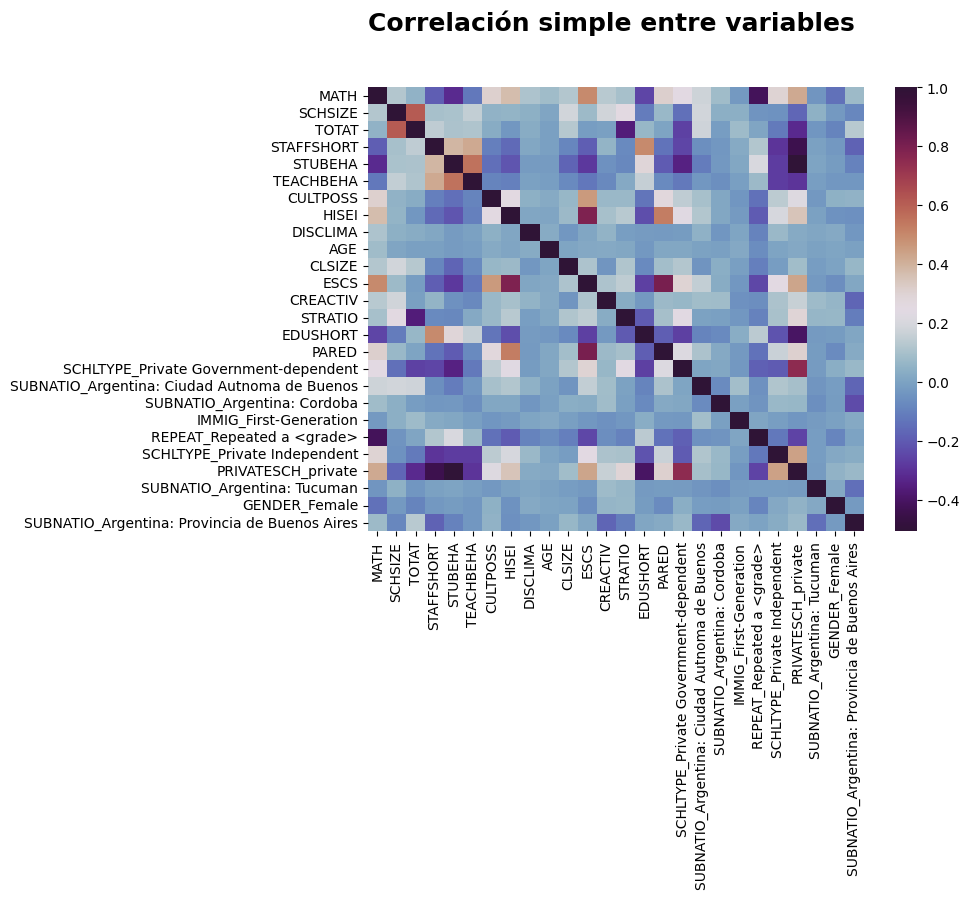

In [ ]:
regression2_corr = regression2.correlation(heat_map=True)

In [ ]:
# Nos quedamos con los valores por encima de la diagonal
upper_tri = regression2_corr.where(np.triu(np.ones(regression2_corr.shape), k=1).astype(bool))
high_corr_pairs = upper_tri.stack().reset_index()
high_corr_pairs.columns = ["Variable 1", "Variable 2", "Correlación"]
# Nos quedamos con los pares de variables cuya correlación sea mayor al 0.6
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs["Correlación"]) > 0.6].reset_index(drop=True)
high_corr_pairs

,Variable 1,Variable 2,Correlación
0,SCHSIZE,TOTAT,0.6125
1,HISEI,ESCS,0.7902
2,ESCS,PARED,0.8024
3,SCHLTYPE_Private Government-dependent,PRIVATESCH_private,0.7515


Se presenta una alta correlación entre `PARED` y `HISEI` con `ESCS`, lo cual es lógico ya que las tres capturan el nivel cosioeconómico de las familias de los alumnos.

Por otro lado, `SCHSIZE` y `TOTAT` también están correlacionadas, ya que ambas reflejan el tamaño de la escuela.

Finalmente `PRIVATESCH_private` y `SCHLTYPE_Private Government-dependent` son dummies que representan prácticamente la mismas característica: escuelas privadas.

Con el solo objetivo de simplificar el modelo, hemos decidido eliminar `PRIVATESCH_private` y `TOTAT`.

In [ ]:
X3 = X2.copy()
X3.remove("TOTAT")
X3.remove("PRIVATESCH_private")

regression3 = MultivariateRegression(X3, Y, df_analysis_dummies)
regression3

                            OLS Regression Results                            
Dep. Variable:                   MATH   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                 1.396e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:17:47   Log-Likelihood:            -1.9971e+06
No. Observations:              369054   AIC:                         3.994e+06
Df Residuals:                  369030   BIC:                         3.995e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### **Verificación de supuestos sobre la estructura el modelo**

**Verificación de especificación lineal**

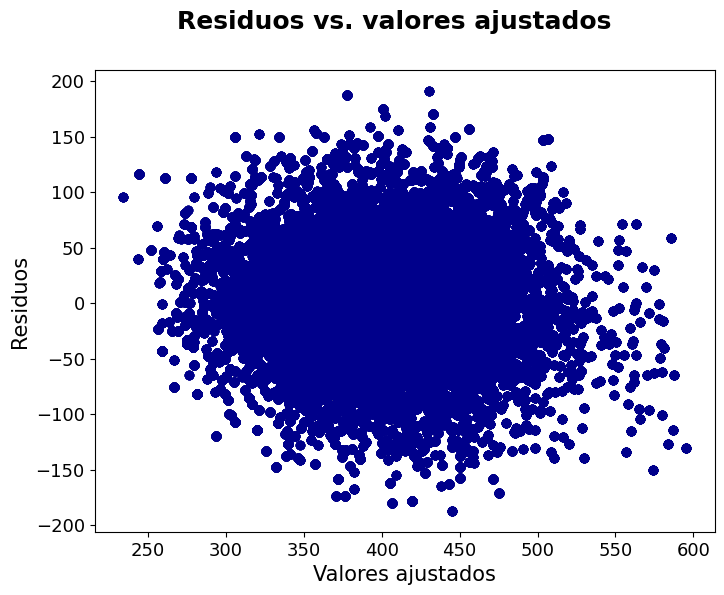

In [ ]:
regression3.residues_vs_fitted_plot()

No parece haber un patrón específico en los residuos y los valores parecen simétricamente distribuidos por encima y por debajo del cero.

**Sin embargo, resultan llamativos los puntos de la derecha. ¿Qué nos están diciendo? Parece que los errores no son simplemente aleatorios como sería de esperar.**

**Test RESET de Ramsey**

En estadística, la prueba prueba RESET de Ramsey es una prueba general de especificación para el modelo de regresión lineal. Más específicamente, esta prueba verifica si las combinaciones no lineales de los valores ajustados ayudan a explicar la variable de respuesta. La intuición detrás de la prueba es que, si las combinaciones no lineales de las variables explicativas tienen algún poder de explicación sobre la variable de respuesta, entonces el modelo está mal especificado (fuente: [Test Reset de Ramsey](https://es.wikipedia.org/wiki/Test_Reset_de_Ramsey)).

In [ ]:
ramsey = regression3.ramsey_test(degree=3)
print(ramsey)

┍━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━━┑
│   F-value │   p-value │   df_denom │   df_num │   degree │
┝━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━┥
│   759.992 │         0 │     369028 │        2 │        3 │
┕━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━┷━━━━━━━━━━┙


El p-valor es 0, lo cual nos indica que agregar **hasta** términos cúbicos podría mejorar nuestro modelo. Veamos en qué variables (continuas) podríamos agregar estos términos para ver si nuestro modelo mejora. Para ello, vamos a analizar la relación entre cada variable explicativa con la objetivo.

In [ ]:
continuous_in_X3 = list(set(X3) & set(continuous))
print(continuous_in_X3)

['SCHSIZE', 'STAFFSHORT', 'STUBEHA', 'TEACHBEHA', 'CULTPOSS', 'HISEI', 'DISCLIMA', 'AGE', 'CLSIZE', 'ESCS', 'CREACTIV', 'STRATIO', 'EDUSHORT', 'PARED']


In [ ]:
# Sacamos las numéricas discretas (es decir que toman valores fijos o pocos y puntuales):
discrete = ["PARED", "CLSIZE", "AGE", "CREACTIV"]
for var in discrete:
    continuous_in_X3.remove(var)

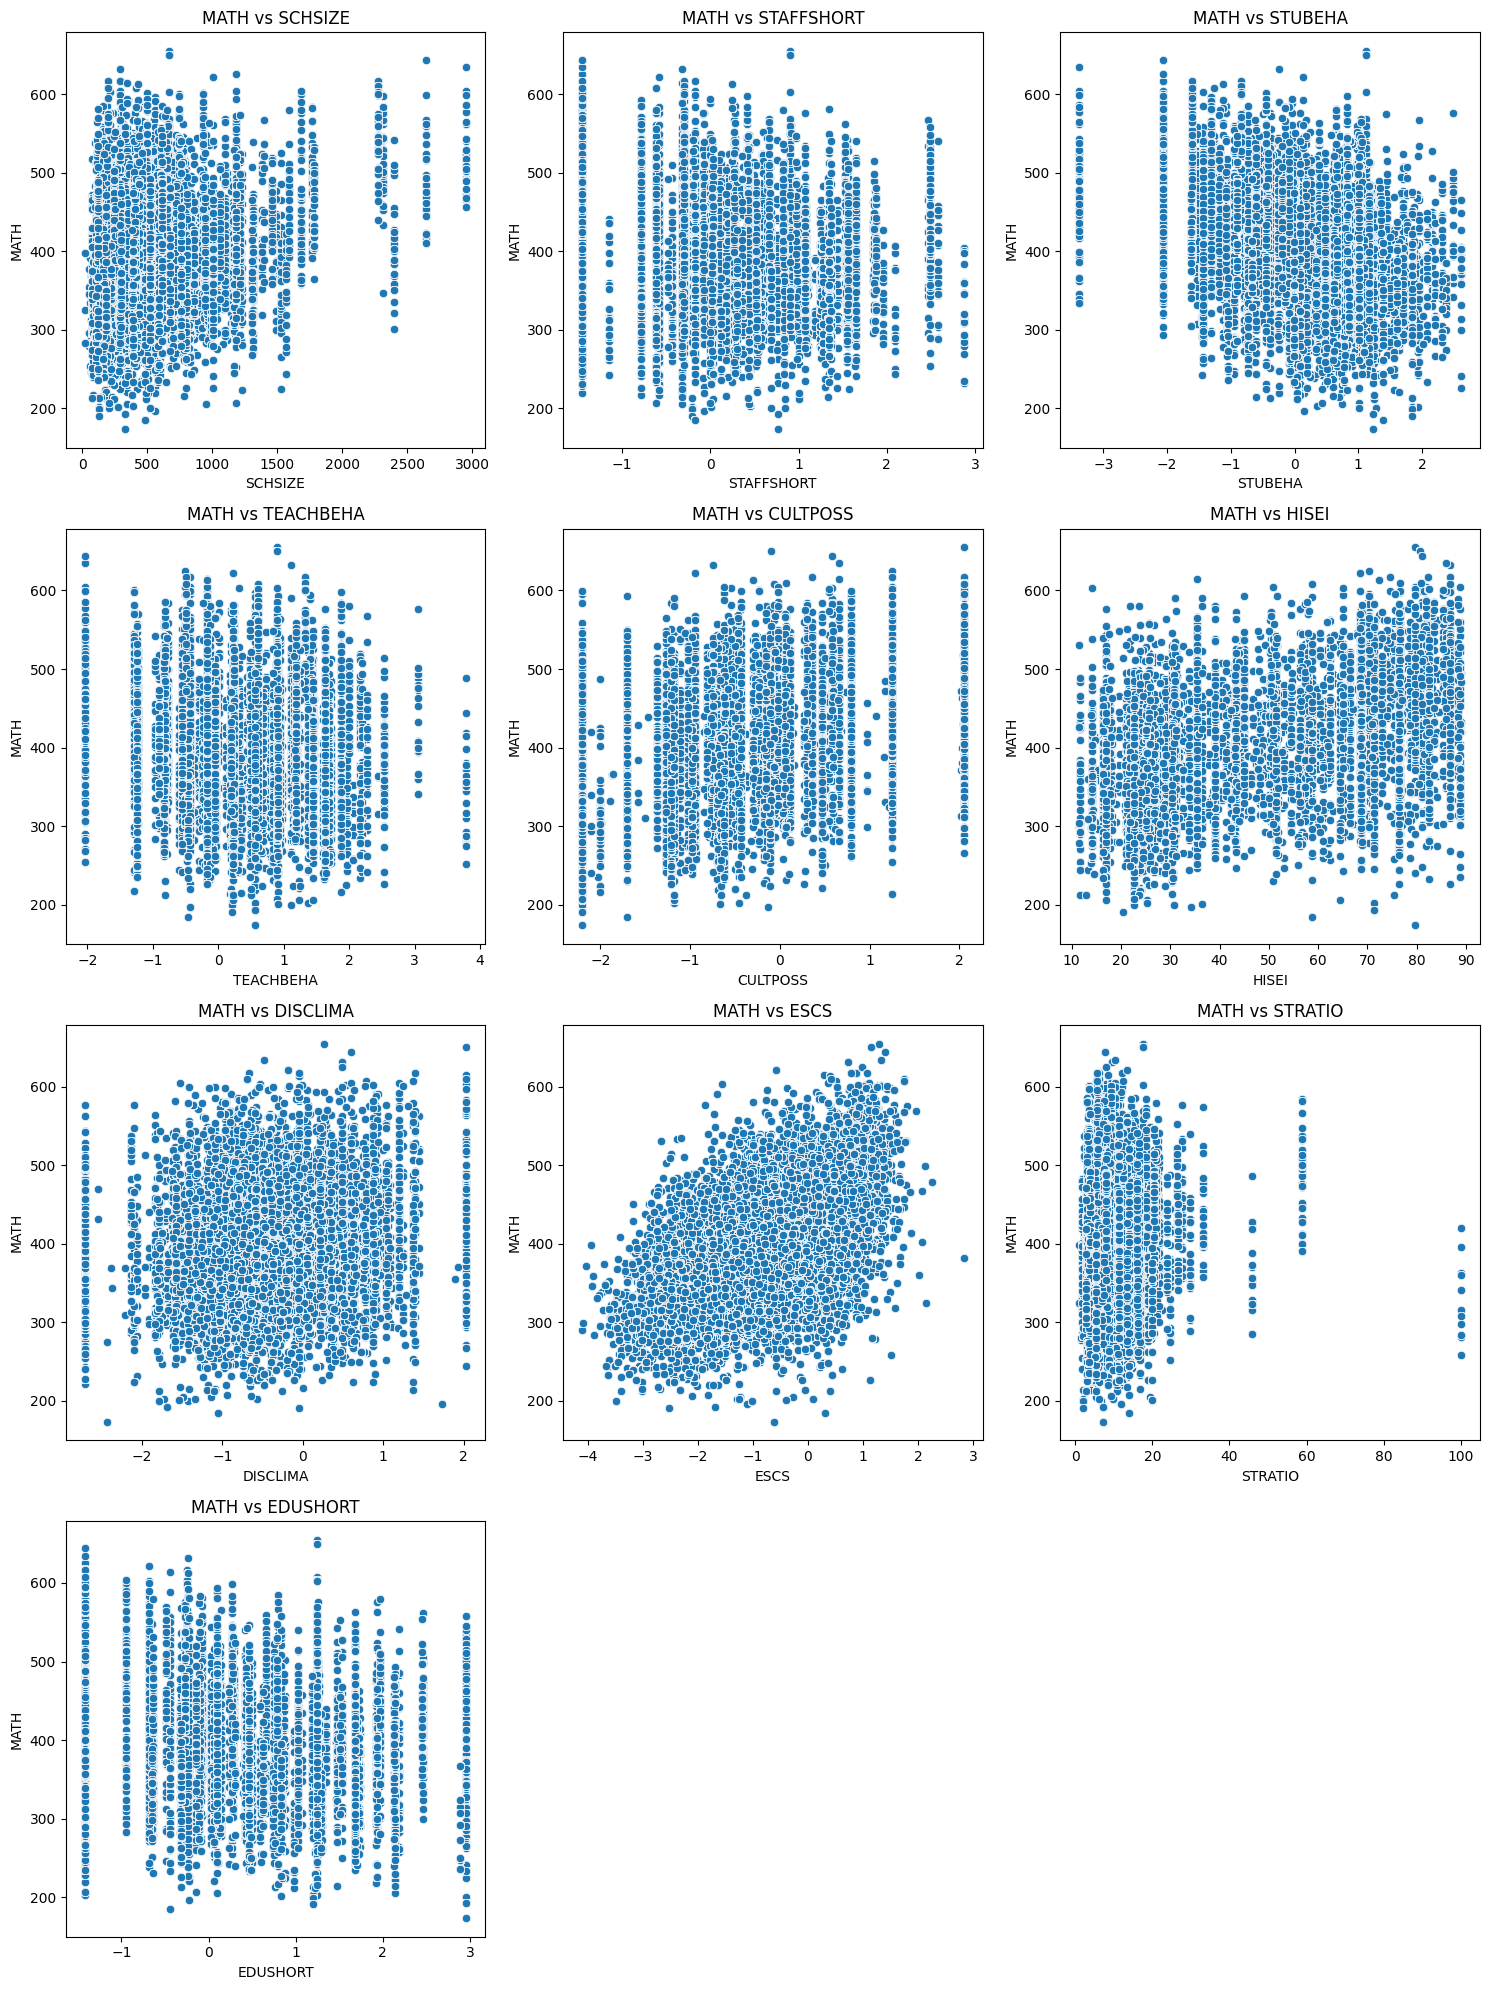

In [ ]:
n = len(continuous_in_X3)
target = Y[0]

fix, axes = plt.subplots(nrows=int(n/3)+1, ncols=3, figsize=(15, 20))
# Para iterar más fácilmente (no tener que indexar fila y columna)
axes = axes.flatten()

for i, var in enumerate(continuous_in_X3):
    sns.scatterplot(data=df_analysis_dummies, x=var, y=target, ax=axes[i])
    axes[i].set_title(f"{target} vs {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)

# No mostrar los subplots que no se usaron
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Resulta difícil encontrar patrones que correspondan a alguna función de grado mayor a 1 claramente.

**Test Rainbow**

In [ ]:
rainbow = regression3.rainbow_test()
print(rainbow)

┍━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┑
│   Estadístico F │   p-valor │
┝━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┥
│         1.00734 │  0.058198 │
┕━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┙


El test de Rainbow no da error de especificación, de momento mantenemos el modelo.

### **Verificación de supuestos sobre el error**

**Media de los residuos próxima a cero**

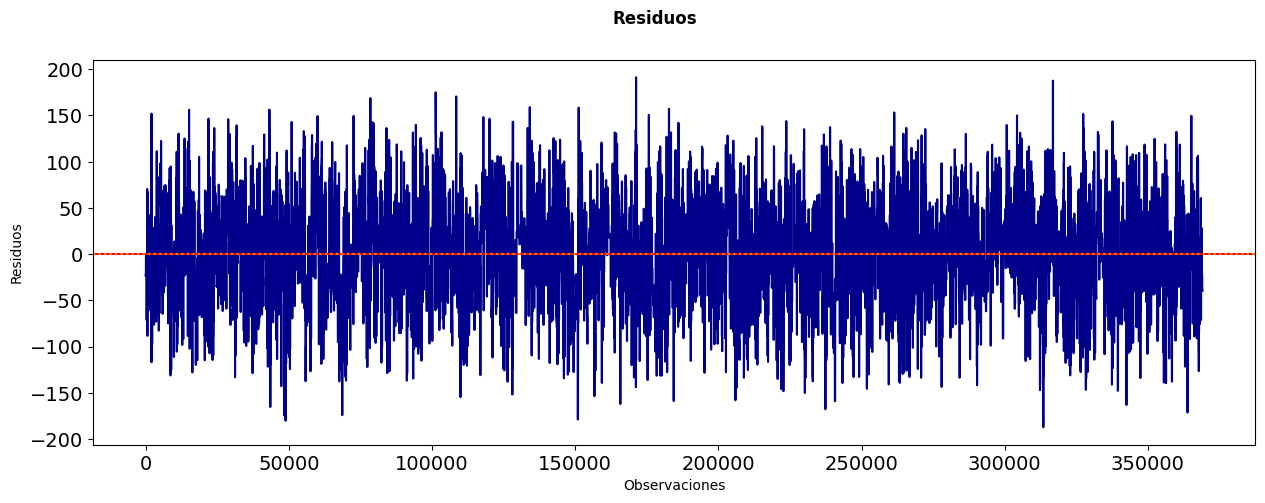

La media de los residuos es 0.00000


In [ ]:
residues_mean = regression3.residues_mean(plot=True)
print(f"La media de los residuos es {residues_mean:.5f}")

Está en torno a cero, aparentemente parece distribuido de manera "pareja" arriba y abajo. Pero deberíamos ver con un poco más de certeza si los residuos del modelo tienen distribución normal, ya que en torno a las observaciones 60.000-70.000, 150.000, hay comportamientos "extraños" de los errores.

In [ ]:
tests = ["jarque_bera", "omnibus", "kolmogorov-smirnov", "shapiro"]
tests_results = regression3.residues_normality_tests(tests)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 369054.
  res = hypotest_fun_out(*samples, **kwds)


**Prueba de Jarque-Bera**

In [ ]:
tests_results["jarque_bera"]

,Value
Jarque-Bera,71.6024
p-valor,0.0000
Asimetría,0.0039
Curtosis,3.0678


Observar que el p-value no supera los niveles de significación usuales. Por lo tanto, se rechaza la hipótesis de normalidad, y en este caso concluimos que no hay normalidad en los residuos.

**Test omnibus**

In [ ]:
tests_results["omnibus"]

,Value
Estadístico K2,67.1735
p-valor,0.0000


De nuevo rechazo rechazamos la hipótesis nula.

**Test Kolmogorov-Smirnov**


In [ ]:
tests_results["kolmogorov-smirnov"]

,Value
Estadístico KS,0.0117
p-valor,0.0010


Y de nuevo.

**Test de Shapiro-Wilk**

In [ ]:
tests_results["shapiro"]

,Value
Estadístico SW,0.9994
p-valor,0.0000


También.

**Métodos gráficos**

Si quisiéramos explorar un poco más el supuesto de normalidad con **métodos gráficos**, podemos hacer un QQ plot, que es el gráfico más habitual para examinar la normalidad.

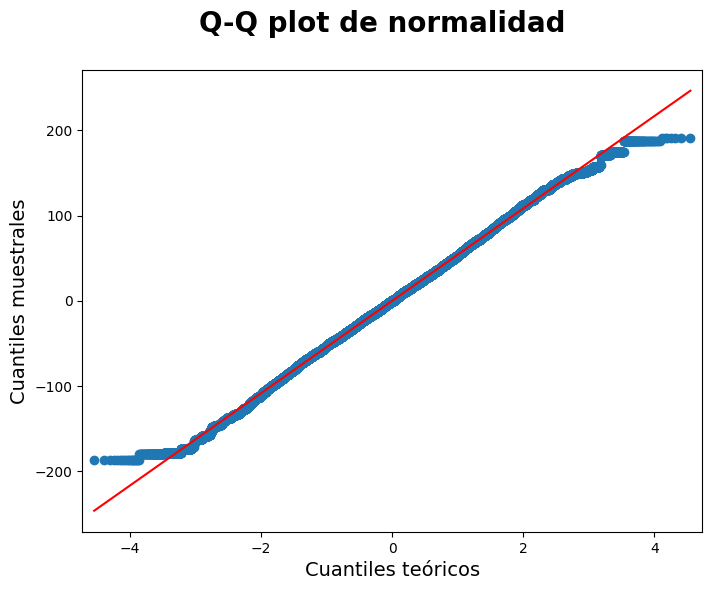

In [ ]:
regression3.residues_qq_plot()

Para analizar aún más la falta de normalidad de los errores, podemos ver el histograma para ver la distribución:

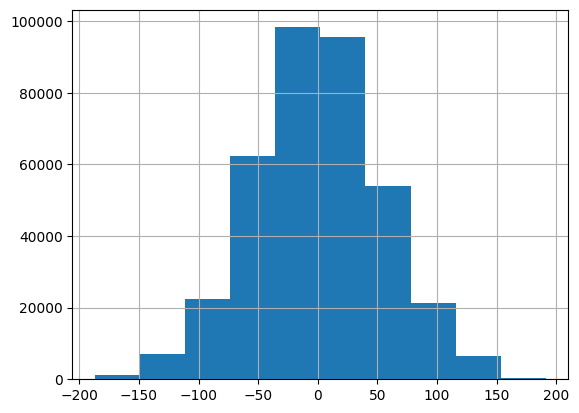

In [ ]:
regression3.residues.hist()
plt.show()

**Causas de la falta de normalidad:**
* Valores atípicos en algún residuo (variables relevantes omitidas).
* Presencia de grupos (distintas poblaciones).

**Consecuencias de la falta de normalidad:**
* Los t de las variables y la F no tienen distribución esperada (t de student y F de snedecor)
* No es posible hacer inferencias sobre el modelo (**estamos en esta etapa**).
* Los coeficientes puntuales siguen siendo válidos (no podemos decir si son significativamente distintos de cero).

### **Análisis de endogeneidad**

Nos queda una posibilidad por explorar. En lugar de incluir las variables (`PARED`, `HISEI`) dentro del modelo, podríamos utilizarlas como variables instrumentales (ya que sabemos que están fuertemente correlacionadas con `ESCS`). La implicancia detrás de este nuevo modelo es que, de excluir `PARED` y `HISEI`, habría endogeneidad asociada a la variable `ESCS`

Para confirmar que existe, utilizamos el contraste de Hausman:

**Contraste de Hausman**

El primer paso del contraste de Hausman es realizar una regresión OLS de la educación en función de una constante, las regresoras exógenas y las variables propuestas como instrumentos.

Al contraste lo haremos entre `PARED` y `HISEI` como instrumentales y `ESCS` como sospechosa de endógena.

In [ ]:
# Variable dependiente del modelo
Y1 = ["MATH"]
# Regresora sospechosa de endógena
Y2 = ["ESCS"]
# Regresoras exógenas
X_exog = X3.copy()
X_exog = [x for x in X_exog if x not in ["ESCS", "PARED", "HISEI"]]
# Variables instrumentales
Z = ["PARED", "HISEI"]

In [ ]:
X_exog

['SCHSIZE',
 'STAFFSHORT',
 'STUBEHA',
 'TEACHBEHA',
 'CULTPOSS',
 'DISCLIMA',
 'AGE',
 'CLSIZE',
 'CREACTIV',
 'STRATIO',
 'EDUSHORT',
 'SCHLTYPE_Private Government-dependent',
 'SUBNATIO_Argentina: Ciudad Autnoma de Buenos',
 'SUBNATIO_Argentina: Cordoba',
 'IMMIG_First-Generation',
 'REPEAT_Repeated a <grade>',
 'SCHLTYPE_Private Independent',
 'SUBNATIO_Argentina: Tucuman',
 'GENDER_Female',
 'SUBNATIO_Argentina: Provincia de Buenos Aires']

In [ ]:
aux = X_exog + Z

Ahora sí podemos obtener la regresión auxiliar que requiere el **contraste de Hausman**.

In [ ]:
aux_regression = MultivariateRegression(aux, Y2, df_analysis_dummies)
aux_regression

                            OLS Regression Results                            
Dep. Variable:                   ESCS   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.199e+05
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:18:15   Log-Likelihood:            -1.9514e+05
No. Observations:              369054   AIC:                         3.903e+05
Df Residuals:                  369031   BIC:                         3.906e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Tanto PARED como HISEI tienen un efecto significativo sobre ESCS.**

Pero para probar esto de una manera más formal es necesario verificar si estos coeficientes de las variables instrumentales también son significativamente distintos de cero en forma conjunta. Para esto podemos llevar adelante un **contraste F de significación conjunta de parámetros**.

In [ ]:
hypothesis = "(PARED=0),(HISEI=0)"
f_test = aux_regression.results.f_test(hypothesis)
print(f"p-valor del test de significación conjunta: {f_test.pvalue}")

p-valor del test de significación conjunta: 0.0


El p-value igual a cero indica que debemos rechazar la hipótesis nula de que ambos coeficientes son conjuntamente iguales a cero, confirmando la relevancia de las variables instrumentales.

Guardemos los residuos de esta regresión auxiliar, también los valores ajustados porque los necesitaremos más adelante.

In [ ]:
df_analysis_dummies["Residuos"] = aux_regression.get_residues()
df_analysis_dummies["ValoresAjustados_ESCS"] = aux_regression.predict()

Ahora estimamos el modelo de interés, pero agregando los residuos de la regresión auxiliar como una variable explicativa más.

In [ ]:
frames2 = Y2 + X_exog + ["Residuos"]
hausman_regression = MultivariateRegression(frames2, Y1, df_analysis_dummies)
hausman_regression

                            OLS Regression Results                            
Dep. Variable:                   MATH   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                 1.448e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:18:17   Log-Likelihood:            -1.9978e+06
No. Observations:              369054   AIC:                         3.996e+06
Df Residuals:                  369031   BIC:                         3.996e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

El coeficiente de los residuos de esta última regresión es significativamente distinto de 0 (0.1009). De esta forma, se rechaza la hipótesis nula de exogeneidad de ESCS y concluimos que es endógena.

Para corregir el problema, se aplica el método de **variables instrumentales con mínimos cuadrados en 2 etapas (IV2SLS)**.

In [ ]:
Z

['PARED', 'HISEI']

In [ ]:
model_2stages = IV2SLS(
    dependent=df_analysis_dummies[Y1],
    exog=sm.add_constant(df_analysis_dummies[X_exog]),
    endog=df_analysis_dummies[Y2],
    instruments=df_analysis_dummies[Z]
)
model_2stages_results = model_2stages.fit()
print(model_2stages_results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                   MATH   R-squared:                      0.4531
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4531
No. Observations:              369054   F-statistic:                 3.029e+05
Date:                Wed, Nov 27 2024   P-value (F-stat)                0.0000
Time:                        21:18:23   Distribution:                 chi2(21)
Cov. Estimator:                robust                                         
                                                                              
                                               Parameter Estimates                                               
                                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------------------
const                     

El modelo en dos etapas parece interesante, sin embargo el valor de $R^2$ ajustado (0.4531) resulta menor que el obtenido en el modelo original con todas las variables corregido con el método backward (eliminando aquellas con coeficiente no significativamente diferentes de cero), cuyo $R^2$ ajustado fue de 0.466.

No obstante, aquel modelo presentó serios problemas de normalidad en los errores. De este modo, no será nuestro modelo definitivo, pero sí será utilizado para sacar algunas conclusiones. Lo repetimos a continuación.

In [ ]:
regression2

                            OLS Regression Results                            
Dep. Variable:                   MATH   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:18:23   Log-Likelihood:            -1.9969e+06
No. Observations:              369054   AIC:                         3.994e+06
Df Residuals:                  369028   BIC:                         3.994e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### **Apreciaciones finales acerca del modelo de regresión y la primera aproximación multivariada**

El ejercicio realizado con regresiones lineales multivariadas nos permitió encontrar algunos coeficientes interesantes (sobre los que no podemos hacer más inferencias, pero cuyos valores puntuales confirman algunas intuiciones).

En primer lugar, según los valores puntuales de los coeficientes, la nota en Matemática parece responder positivamente a valores más altos de `CULTPOSS` y `ESCS`. Contrariamente a lo intuitivo, responde negativamente a valores altos de `HISEI` y `PARED`. Esto podría deberse a la multicolinealidad detectada, o a un intento del modelo por "compensar" los efectos de las variables. Esto significa que los resultados observados de manera individual, no necesariamente se reflejan en el ejericio multivariado (estamos  intentando ajustar cosas diferentes).

Por este motivo, para comprender un poco mejor avanzaremos en otro análisis, considerando las variables `CULTPOSS`, `ESCS`, `HISEI` y `PARED` como la "situación en el hogar" del alumno, e intentando encontrar grupos con características similares en este aspecto.

Por otro lado, la nota en Matemática también parece responder positivamente a `TEACHBEHA`, `DISCLIMA` y `SCHSIZE`. Por las razones mencionadas sobre el ajuste del modelos para la "situación  en el hogar", también intentaremos profundizar más en "situación en la escuela", con el objetivo de comprender mejor las implicancias sobre el resultado de los niños.

Por último, y no menos importante, los coeficientes de las variables Dummy confirman las diferencias observadas en la primera parte de este trabajo (Entrega 1). Los alumnos de Tucumán, inmigrantes y aquellos que repitieron obtienen peores calificaciones, los de escuelas privadas, mejores.

## **Componentes principales**

Podemos volver un paso atrás.

Dado que estamos buscando los factores explicativos del desempeño de los alumnos, con el objetivo de predecir el resultado de cada uno, podemo olvidar por un momento este output y vovler a la búsqueda de explicaciones. El Análisis de Componentes Principales puede ayudarnos en este propósito.

El análisis de componentes principales (ACP) se aplica cuando se tiene un número elevado de **variables cuantitativas** correlacionadas entre sí.

Sus objetivos son:
* Analizar la interdependencia entre las variables originales.
* Obtener nuevas variables llamadas **componentes principales**, que se calculan como combinación lineal de las p variables originales.
* Utilizar pocas componentes en la aplicación de otras técnicas, tales como clustering y regresión múltiple.

Algo a tener en cuenta a la hora de calcular las componentes principales:
* La primera componente principal es aquella que explica la mayor parte de la varianza de la muestra.
* La segunda es la que sigue en magnitud de explicación y es independiente de la primera, y así sucesivamente.

En nuestro caso, las variables cuantitativas que nosotros habíamos reconocido como inlfuyentes en el desempeño eran las siguientes:

Es importante destacar que el ACP no trabaja con variables categóricas, por lo que si posteriormente llevamos a cabo la aplicación de alguna técnica utilizando las componentes calculadas, va a ser necesario agregar las variables categóricas.

In [ ]:
print(f"Cantidad de variables cuantitativas: {len(continuous)}")

Cantidad de variables cuantitativas: 20


Utilizamos el DataFrame con la extracción de valores nulos, pero quedándonos solamente con las variables continuas:

In [ ]:
df_PCA = df_analysis_clean[continuous_in_clean]

Veamos primero la correlación entre todas estas variables, para ver si podemos detectar alguna interdependencia notable:

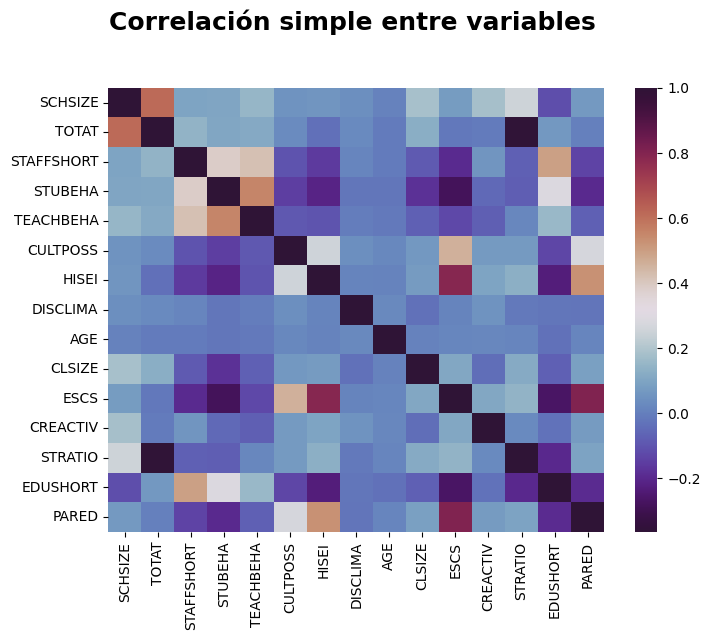

In [ ]:
df_PCA_corr = df_correlation(df_PCA, heat_map=True)

In [ ]:
# Nos quedamos con los valores por encima de la diagonal
upper_tri = df_PCA_corr.where(np.triu(np.ones(df_PCA_corr.shape), k=1).astype(bool))
high_corr_pairs = upper_tri.stack().reset_index()
high_corr_pairs.columns = ["Variable 1", "Variable 2", "Correlación"]
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs["Correlación"]) > 0.6].reset_index(drop=True)
high_corr_pairs

,Variable 1,Variable 2,Correlación
0,SCHSIZE,TOTAT,0.6125
1,HISEI,ESCS,0.7902
2,ESCS,PARED,0.8024


In [ ]:
df_PCA_scaled = pd.DataFrame(
    StandardScaler().fit_transform(df_PCA),
    columns=df_PCA.columns
)

In [ ]:
# Cálculo de componentes principales sobre los datos estandarizados
pca = PCA()
pca.fit(df_PCA_scaled)

# Porcentaje de la varianza de cada componente
explained_variance = pca.explained_variance_ratio_

# Observar que va de mayor a menor
accum = 0
for i, variance in enumerate(list(explained_variance)):
    variance_pct = variance * 100
    accum += variance_pct
    print(f"Varianza explicada por la CP{i}: % {variance_pct:.4}")
    print(f"Varianza explicada acumulada hasta la CP{i}: % {accum:.4}\n")

Varianza explicada por la CP0: % 21.44
Varianza explicada acumulada hasta la CP0: % 21.44

Varianza explicada por la CP1: % 13.07
Varianza explicada acumulada hasta la CP1: % 34.5

Varianza explicada por la CP2: % 9.955
Varianza explicada acumulada hasta la CP2: % 44.46

Varianza explicada por la CP3: % 8.491
Varianza explicada acumulada hasta la CP3: % 52.95

Varianza explicada por la CP4: % 7.391
Varianza explicada acumulada hasta la CP4: % 60.34

Varianza explicada por la CP5: % 6.645
Varianza explicada acumulada hasta la CP5: % 66.99

Varianza explicada por la CP6: % 6.528
Varianza explicada acumulada hasta la CP6: % 73.51

Varianza explicada por la CP7: % 6.243
Varianza explicada acumulada hasta la CP7: % 79.76

Varianza explicada por la CP8: % 5.371
Varianza explicada acumulada hasta la CP8: % 85.13

Varianza explicada por la CP9: % 4.577
Varianza explicada acumulada hasta la CP9: % 89.7

Varianza explicada por la CP10: % 3.233
Varianza explicada acumulada hasta la CP10: % 92.94


Vemos que hasta la CP8 tenemos un 85.13% de explicabilidad de la varianza. Vamos quedarnos con esas 9. Pasamos de tener 20 variables a tener 9.

Analicemos las variables involucradas en cada CP y los pesos que se les asignan:


In [ ]:
pca_components = pca.components_
pd.DataFrame(
    pca_components.T,
    index=df_PCA_scaled.columns,
    columns=[f"CP{i}" for i in range(len(pca_components))]
)

,CP0,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,CP13,CP14
SCHSIZE,0.0314,0.5013,0.4442,0.2395,0.0756,-0.0598,-0.0360,-0.1059,0.0067,-0.2842,0.0915,-0.0012,0.0364,-0.6170,-0.0015
TOTAT,-0.0695,0.4646,0.4462,-0.3532,-0.0904,0.0617,-0.0883,-0.1099,0.0051,-0.1465,-0.0239,0.0250,0.0443,0.6317,0.0008
STAFFSHORT,-0.2851,0.3397,-0.2839,-0.0153,0.0852,-0.1057,0.2637,0.2179,-0.0386,-0.1658,-0.5554,0.0191,-0.4989,-0.0168,0.0034
STUBEHA,-0.3189,0.2935,-0.2635,0.1478,-0.0564,0.1089,-0.1809,-0.1477,0.0664,0.2539,0.6155,0.0796,-0.4387,0.0573,0.0395
TEACHBEHA,-0.2321,0.3728,-0.2793,0.2571,-0.1303,0.1721,-0.2052,-0.0532,-0.0037,0.3577,-0.3190,-0.0653,0.5809,0.0007,-0.0097
CULTPOSS,0.2680,0.1407,-0.0899,-0.1094,0.0742,0.0601,0.0080,0.1858,0.9017,0.0627,-0.0098,0.0398,0.0042,-0.0283,-0.1583
HISEI,0.4074,0.1841,-0.2341,-0.0544,-0.0353,-0.0020,-0.0327,-0.0265,-0.2700,-0.0282,0.0144,0.7128,0.0321,-0.0034,-0.3953
DISCLIMA,0.0087,0.0374,0.0549,-0.0632,0.5641,0.2210,-0.4630,0.6049,-0.1925,0.0266,0.0605,-0.0496,-0.0033,0.0112,-0.0091
AGE,0.0244,-0.0045,0.0258,0.0402,0.2713,0.8037,0.4918,-0.1813,-0.0407,-0.0212,0.0199,0.0136,0.0124,0.0025,0.0010
CLSIZE,0.1199,0.0959,0.3502,0.1307,-0.3440,-0.0097,0.3744,0.5186,-0.1190,0.5313,0.0708,0.0268,-0.0839,-0.0056,-0.0045


### **¿No ACP?**

Se intentó avanzar en un Análisis de Componentes Principales, pero llegamos a la conclusión de que no resulta apropiado dados nuestros objetivos. Si queremos conocer las variables que afectan el desempeño de los alumnos para guiar políticas públicas, los componentes principales anulan esta posibilidad, ya que perdemos el verdadero efecto de las variables explicativas. Además, la cantidad de variables con la que estamos trabajando no resulta exorbitante como para tener que aplicar reducción de dimensionalidad.

## **Clustering**

Continuando en la línea de profundizar la caracterización y descripción del resultado de los alumnos, y teniendo en cuenta que el modelo de regresión multivariada no nos aportó suficiente información en pos de nuestro objetivo, consideramos que la base de datos PISA se presta para llevar a cabo un **análisis de clustering**.

Este análisis podría permitirnos encontrar diferentes agrupaciones naturales de las observaciones que sirvan de guía a nuestro propósito.

### **Clustering no jerárquico**: método k means


Retomando la idea de "situación en el hogar" y "situación en la escuela" como drivers del desempeño del estudiante, hemos decidido utilizar las variables correspondientes en un análisis de clusters. De esta forma, el análisis se dividirá en dos:
- Por un lado, se agruparán los alumnos teniendo en cuenta la "situación en el hogar", a partir de las variables `ESCS`, `HISEI`, `PARED` y `CULTPOSS`.
- En segundo lugar, se los agrupará considerado la "situación en la escuela", a partir de las variables `SCHSIZE`, `DISCLIMA` y `TEACHBEHA`.

Teniendo los clústers para los dos ámbitos (hogares y escuelas), se observará el resultado obtenido en las tres materias.

Creemos que la construcción de estos grupos permitirá trazar perfiles que podrían mejorar el entendimeinto de la problemática.

In [ ]:
df_clean_continuous = df_analysis_clean[continuous_in_clean + ["MATH", "READ", "SCIE"]]
df_clean_continuous.columns

Index(['SCHSIZE', 'TOTAT', 'STAFFSHORT', 'STUBEHA', 'TEACHBEHA', 'CULTPOSS',
       'HISEI', 'DISCLIMA', 'AGE', 'CLSIZE', 'ESCS', 'CREACTIV', 'STRATIO',
       'EDUSHORT', 'PARED', 'MATH', 'READ', 'SCIE'],
      dtype='object')

In [ ]:
df_clean_continuous_scaled = pd.DataFrame(
    StandardScaler().fit_transform(df_clean_continuous),
    columns=df_clean_continuous.columns
)

In [ ]:
subjects = ["MATH", "READ", "SCIE"]
home_sit = ["ESCS", "HISEI", "CULTPOSS", "PARED"]
schl_sit = ["SCHSIZE", "DISCLIMA", "TEACHBEHA"]

In [ ]:
df_clean_continuous_scaled_home_sit = df_clean_continuous_scaled[home_sit + subjects]
df_clean_continuous_scaled_schl_sit = df_clean_continuous_scaled[schl_sit + subjects]

Vamos a estimar cluster con una muestra aleatoria de las observaciones para agilizar el procesamiento:

In [ ]:
# Tomamos muestras diferentes para los dos analisis
df_sampled_cluster_home = df_clean_continuous_scaled_home_sit.sample(n=100000, random_state=0)
df_sampled_cluster_schl = df_clean_continuous_scaled_schl_sit.sample(n=100000, random_state=0)

#### **Selección del número de grupos**

En el método de k-means, tenemos que determinar previamente la cantidad de clustsers que queremos. Para ello, utilizaremos el **método del codo** (elbow):

Agrupando por **situación en el hogar**:

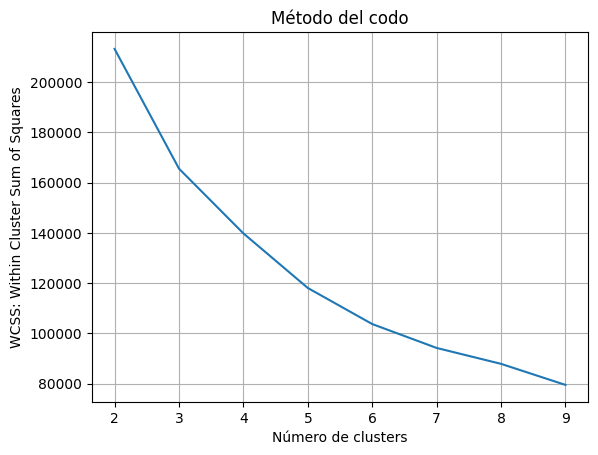

In [ ]:
wcss = []
range_n_clusters = list(range(2, 10))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto', max_iter=50)
    kmeans.fit(df_sampled_cluster_home[home_sit])
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range_n_clusters, wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS: Within Cluster Sum of Squares")
plt.grid()
plt.show()

El "codo" se pordice en los 5 grupos.

Agrupando por **situación en la escuela**:

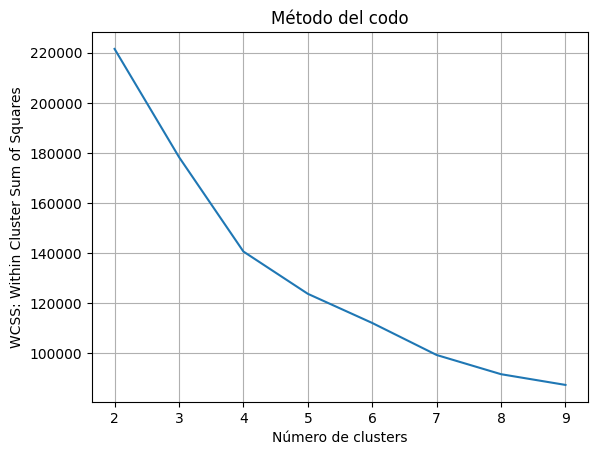

In [ ]:
wcss = []
range_n_clusters = list(range(2, 10))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto', max_iter=50)
    kmeans.fit(df_sampled_cluster_schl[schl_sit])
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range_n_clusters, wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS: Within Cluster Sum of Squares")
plt.grid()
plt.show()

El "codo" se pordice en los 4 grupos.

#### **Construcción de los clusters**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto', max_iter=50)
kmeans.fit(df_sampled_cluster_home[home_sit])
clusters_home = kmeans.fit_predict(df_sampled_cluster_home[home_sit])

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto', max_iter=50)
kmeans.fit(df_sampled_cluster_schl[schl_sit])
clusters_schl = kmeans.fit_predict(df_sampled_cluster_schl[schl_sit])

In [ ]:
df_sampled_cluster_home["CLUSTER"] = clusters_home
df_sampled_cluster_schl["CLUSTER"] = clusters_schl

In [ ]:
home_sit_3D = home_sit.copy()
home_sit_3D.remove('PARED')

Graficar la situación en el hogar

In [ ]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'yellow',
    4: 'brown',
}
X, Y, Z = home_sit_3D

scatter_plot_3d(df_sampled_cluster_home, X, Y, Z, "CLUSTER", cluster_colors)

Output hidden; open in https://colab.research.google.com to view.

Claramente, el cluster 1  es el que peores indicadores de la situación en el hogar tiene. El cluster 4, en cambio, tiene la mejor situación hogareña.

Veamos ahora este resultado relacionado con las notas. Para ello, se tomarán los dos clusters extremos.

#### **Clusters de la situación en el hogar vs notas**

In [ ]:
best_cluster = 4
worst_cluster = 1

In [ ]:
df_sampled_cluster_cut = df_sampled_cluster_home[df_sampled_cluster_home["CLUSTER"].isin([best_cluster,worst_cluster])]
cluster_colors = {
   best_cluster: 'green',
  worst_cluster: 'yellow',
}
X, Y, Z = subjects

scatter_plot_3d(df_sampled_cluster_cut, X, Y, Z, "CLUSTER", cluster_colors)

Como era esperado, los dos clusters extremos tienen resultados casi opuestos en las calificaciones. El cluster 1 (alumnos con una "mala" situación en el hogar) encuentra a casi todos sus miembros cerca del origen en el espacio de las tres notas.

Este grupo sería un objetivo de interés para aplicar políticas públicas en los hogares que puedan mejorar el desempeño educativo.

#### **Clusters de la situación en la escuela vs notas**

In [ ]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
}
X, Y, Z = schl_sit

scatter_plot_3d(df_sampled_cluster_schl, X, Y, Z, "CLUSTER", cluster_colors)

Output hidden; open in https://colab.research.google.com to view.

Veamos la situación en la escuela en relación a las notas

In [ ]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
}
X, Y, Z = subjects

scatter_plot_3d(df_sampled_cluster_schl, X, Y, Z, "CLUSTER", cluster_colors)

Output hidden; open in https://colab.research.google.com to view.

Los clusters construidos según la situación en la escuela no muestran una regularidad en el espectro de notas, por el contrario parecen distribuidos casi de manera aleatoria.

De esta forma, y al menos considerando solamente estas tres variables (`SCHSIZE`, `DISCLIMA` y `TEACHBEHA`), el análisis de la situación en la escuela no muestra resultados tan concluyentes como los observados en los hogares.

En los términos de la elección pública, parece más apropiado encarar una política en los hogares.

**Veamos un análisis similar con las categoricas**

Notar que formalmente, el análisis que haremos a continuación no constituye aprendizaje no supervisado ya que los clusters se toman como dados a partir de una variable categórica en lugar de estimarlos con K-means.

Además, las conclusiones que saquemos de aquí deberían confirmar de una forma visual los tests de hipótesis sobre el impacto de las variables categóricas hechos en la Entrega 1. Consideramos que la forma visual puede ser una buena presentación de estos resultados.

In [ ]:
df_clean_categorical = df_analysis_clean[categorical_in_clean + ["MATH", "READ", "SCIE"]]
df_clean_categorical.columns

Index(['SUBNATIO', 'REPEAT', 'IMMIG', 'SCHLTYPE', 'GENDER', 'PRIVATESCH',
       'MATH', 'READ', 'SCIE'],
      dtype='object')

Nuevamente trabajamos con una muestra para agilizar el procesamiento.

In [ ]:
df_clean_categorical_sample = df_clean_categorical.sample(n=100000, random_state=0)

Vamos primero con `SCHLTYPE`, que indicaba el tipo de escuela:
- Pública
- Privada Independiente
- Privada Dependiente del Gobierno

In [ ]:
df_clean_categorical_sample["SCHLTYPE"].unique()

array(['Private Government-dependent', 'Public', 'Private Independent'],
      dtype=object)

In [ ]:
schltype_colors = {
    "Private Government-dependent": 'red',
    "Public": 'blue',
    "Private Independent": 'green'
}
X, Y, Z = subjects

scatter_plot_3d(df_clean_categorical, X, Y, Z, "SCHLTYPE", schltype_colors)

Output hidden; open in https://colab.research.google.com to view.

El tipo de escuela sí parece influir en los resultados:

- Los estudiantes de escuelas públicas tienen notas más bajas en su mayoría que los estudiantes de escuelas privadas (ya sea independientes o dependientes del gobierno).

Ahora veamos la repitencia, dada por la variable `REPEAT`:

In [ ]:
df_clean_categorical_sample["REPEAT"].unique()

array(['Did not repeat a <grade>', 'Repeated a <grade>'], dtype=object)

In [ ]:
repeat_colors = {
    "Did not repeat a <grade>": 'green',
    "Repeated a <grade>": 'red'
}
X, Y, Z = subjects

scatter_plot_3d(df_clean_categorical_sample, X, Y, Z, "REPEAT", repeat_colors)

Output hidden; open in https://colab.research.google.com to view.

La repitencia también parece tener un efecto significativo: los alumnos que han repetido de grado tienen un desempeño pero que los que no lo han hecho.

Veamos `SUBNATIO`, que indica la región a la que pertenece el alumno:

In [ ]:
df_clean_categorical_sample["SUBNATIO"].unique()

array(['Argentina', 'Argentina: Ciudad Autnoma de Buenos',
       'Argentina: Provincia de Buenos Aires', 'Argentina: Tucuman',
       'Argentina: Cordoba'], dtype=object)

Al ser 5 valores posibles, el gráfico no resulta muy útil en este caso.

### **Apreciaciones finales de clusters**

Si bien el análisis llevado a cabo no es determinante, nos ayudó a identificar algunas cuestiones.
- Los clusters extremos en cuanto a la situación en el hogar parecen mostrar comportamientos también extremos en las notas.
- La situación en la escuela no tiene un impacto tan notorio.

Vale la pena recordar que otras agrupaciones predefinidas en la base (escuela pública o privada, repitencia, región geográfica) demostraron tener efectos significativos en los análisis de la priemra entrega, y también deberían ser tenidos en cuenta a la hora de priorizar.

De esta forma, el análisis de cluster nos permitió clarificar un poco más el objetivo: la situación en el el hogar es determinante.

La siguiente pregunta es **¿cómo puedo predecir a qué alumno canalizarle ayuda para mejorar su situación en el hogar?**

Para intentar responder esto, pasaremos ahora a nuestro objetivo predictivo mediante un análisis de clasificación que nos permita predecir si un alumno va a aprobar o no una materia.

## **Clasifcación supervisada**

El criterio que utilizaremos para llevar a cabo la clasificación será: **"el alumno supera (o no) el valor que PISA considera como el nivel básico de competencia en cada materia"**.

Siguiendo lo discutido en la sección de "Objetivos", los valores para cada materia son los siguientes:


In [ ]:
READ_THRESH = 407
MATH_THRESH = 420
SCIE_THRESH = 409

Con estos umbrales, agregamos variables al DataFrame que indiquen si el alumno lo superó o no en cada materia:

In [ ]:
df_analysis_clean["PASSED_MATH"] = (df_analysis_clean["MATH"] >= MATH_THRESH).astype(int)
df_analysis_clean["PASSED_READ"] = (df_analysis_clean["READ"] >= READ_THRESH).astype(int)
df_analysis_clean["PASSED_SCIE"] = (df_analysis_clean["SCIE"] >= SCIE_THRESH).astype(int)

df_analysis_clean["OVERALL_PERF"] = df_analysis_clean["PASSED_MATH"] + df_analysis_clean["PASSED_READ"] + df_analysis_clean["PASSED_SCIE"]

Es importante notar lo siguiente: dado que nuestro interés es **identificar a los alumnos que potencialmente desaprobarían**, lo que querremos lograr es **minimizar** es la cantidad de **falsos positivos**, es decir la cantidad de casos en las que el modelo predice que el alumno va a aprobar cuando en realidad no aprueba, y **maximizar la cantidad de verdaderos negativos**.

Dicho esto, la métrica a la que prestaremos más atención es la de "Recall" para valores negativos, también llamada "True Negative Rate" o "Escpecificidad" puede ser la más interesante:
$$
\text{Specificity} = \frac{\text{TN (True Negative)}}{\text{TN (True Negative) + FP (False Positive)}}
$$
Querremos maximizarla.

*NOTA: en esta entrega no emplearemos búsqueda de hiperparámetros, usaremos los que vienen por defecto.*

### **Discriminante lineal**

#### **Usando solamente la situación en el hogar**

Partimos de la sospecha de que el impacto de la situación en el hogar es grande (lo que se refleja en en análisis de clusters), por eso grafiquemos el resultado ("pasó"/"no pasó") en Matemática frente a las tres variables que consideramos como determinantes de la situación socioeconómica en el hogar del niño.


In [ ]:
home_sit = ["ESCS", "HISEI", "CULTPOSS"]
schl_sit = ["STRATIO", "DISCLIMA", "TEACHBEHA"]

In [ ]:
passedmath_colors = {
    0: 'red',
    1: 'green'
}
X, Y, Z = home_sit

scatter_plot_3d(df_analysis_clean, X, Y, Z, "PASSED_MATH", passedmath_colors)

Output hidden; open in https://colab.research.google.com to view.

Vemos inicialmente que aunque el resultado en Matemática parece tener alguna regularidad en estas tres variables (mientras más cerca de la ordenada al origen, más alumnos no pasaron matemáticas), no parece ser suficiente para explicar todo el comportamiento.

Por ese motivo, primero haremos una clasificación teniendo en cuenta estas tres variables y luego incluiremos más variables para ver si nuestro modelo mejora.

Como dijimos, en primera insancia, trabajaremos con las variables continuas relacionadas a hogares que se utilizaron en el análisis de clusters, esto es `ESCS`, `HISEI` y `CULTPOSS`.

Veamos primero cómo es el balanceo en nuestra base de datos con respecto a la variable `PASSED_MATH`:

In [ ]:
df_analysis_clean["PASSED_MATH"].value_counts() / len(df_analysis_clean) * 100

,count
PASSED_MATH,
0,65.9126
1,34.0874


Vemos que esta bastante desbalanceada: hay muchos más alumnos que no aprobaron Matemática que los que sí lo hicieron (este dato resulta también bastante curioso e interesante).

Por lo tanto, tomamos la decisión de, a la hora de hacer las clasificaciones, balancear las clases. Para hacer esto, hay varias técnicas. Nosotros utilizaremos una conocida como **SMOTE: Synthetic Minority Over-Sampling Technique**, que conciste en crear sintéticamente más instancias de la clase minoritaria.

A los fines de los objetivos y el propósito de este trabajo es conveniente balancear por sobremuestreo de la clase minoritaria (los 1) en lugar de submuestreo de la clase mayoritaria (los 0), ya que nuestro interés es predecir estos 0, por lo que no queremos perder ninguna observación.

In [ ]:
# Definimos las variables explicativas y la variable target
X1 = home_sit.copy()
df_X1 = StandardScaler().fit_transform(df_analysis_clean[X1])
df_X1 = pd.DataFrame(df_X1, columns=X1)

Y = "PASSED_MATH"
df_Y = df_analysis_clean[Y]

In [ ]:
# Dividimos en conjunto de entrenamiento y prueba
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    df_X1, df_Y, test_size=0.3, random_state=42, stratify=df_Y
)

# Aplicamos SMOTE para sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_1_balanced, y_train_1_balanced = smote.fit_resample(X_train_1, y_train_1)

In [ ]:
# Entrenamos el modelo
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X_train_1_balanced, y_train_1_balanced)

# Predecimos sobre el conjunto de test
pred_test_1 = lda1.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1, pred_test_1, digits=4))
print(f"Precisión: {accuracy_score(y_test_1, pred_test_1):.4f}")

              precision    recall  f1-score   support

           0     0.8121    0.6697    0.7340     72976
           1     0.5230    0.7003    0.5988     37741

    accuracy                         0.6801    110717
   macro avg     0.6675    0.6850    0.6664    110717
weighted avg     0.7135    0.6801    0.6879    110717

Precisión: 0.6801


Vemos que la especificidad es del 67%, podríamos mejorarla un poco. Si bien la precisión de valores negativos es bastante alta (81%), la de los valores positivas es aproximadamente aleatoria (53%).

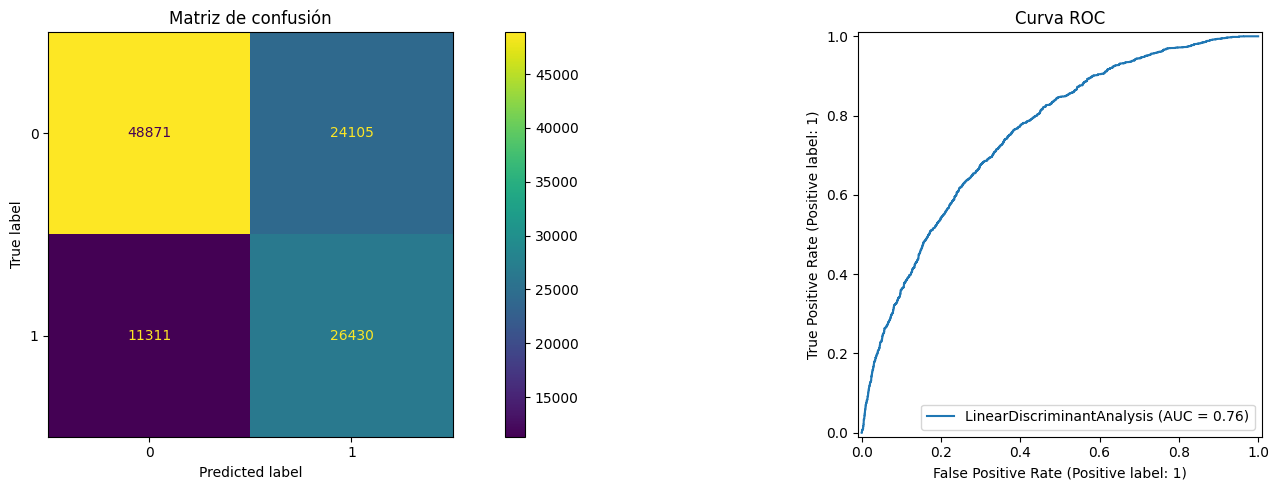

In [ ]:
confusion_matrix_and_roc_curve(lda1, X_test_1, y_test_1, pred_test_1)

#### **Agregamos más variables a la clasificación**
Agreguemos más variables a la clasificación a ver si podemos mejorar el resultado:

In [ ]:
# Creamos un nuevo DataFrame con las variables dummies
df_analysis_dummies = df_analysis_clean.copy()
dummies_columns = []
for var in categorical_in_clean:
    dummies = pd.get_dummies(df_analysis_clean[var], prefix=var).astype(int)
    dummies_columns.extend(dummies.columns)
    df_analysis_dummies = pd.concat([df_analysis_dummies, dummies], axis=1)

In [ ]:
# De cada dummie, eliminamos un valor.
to_drop = [
    "SUBNATIO_Argentina",
    "GENDER_Male",
    "IMMIG_Native",
    "REPEAT_Did not repeat a <grade>",
    "PRIVATESCH_public",
    "SCHLTYPE_Public"
]
df_analysis_dummies.drop(columns=to_drop, inplace=True)
dummies_columns = list(set(dummies_columns) - set(to_drop))

In [ ]:
X2 = continuous_in_clean + dummies_columns
# Saquemos la que en la regresión multivariada comprobamos que no es significativa
X2.remove("IMMIG_Second-Generation")
df_X2 = StandardScaler().fit_transform(df_analysis_dummies[X2])
df_X2 = pd.DataFrame(df_X2, columns=X2)

Y = "PASSED_MATH"
df_Y = df_analysis_dummies[Y]

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df_X2, df_Y, test_size=0.2, random_state=42, stratify=df_Y
)

smote = SMOTE(random_state=42)
X_train_2_balanced, y_train_2_balanced = smote.fit_resample(X_train_2, y_train_2)

In [ ]:
lda2 = LinearDiscriminantAnalysis()
lda2.fit(X_train_2_balanced, y_train_2_balanced)

pred_test_2 = lda2.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2, pred_test_2, digits=4))
print(f"Precisión: {accuracy_score(y_test_2, pred_test_2):.4f}")

              precision    recall  f1-score   support

           0     0.8593    0.7268    0.7876     48651
           1     0.5931    0.7700    0.6701     25160

    accuracy                         0.7415     73811
   macro avg     0.7262    0.7484    0.7288     73811
weighted avg     0.7686    0.7415    0.7475     73811

Precisión: 0.7415


Comparación con el modelo anterior:
- La precisión global aumentó un 6%: pasó del 68% al 74%. Dado que entrenamos nuestro modelo con clases balanceadas, esta es una métrica a la que podemos dar importancia.
- La precisión sobre los valores negativos pasó del 81% al 86% y su recall (que es lo que más nos interesa) también aumentó: pasó del 67% al 73%.
- Además, la precisión sobre la clase 1 también aumentó: pasó del 52% al 59%.
- El f1-score mejoró en ambas clases: en la clase 0, pasó del 73% al 79%, y en la positiva del 60% al 67%.

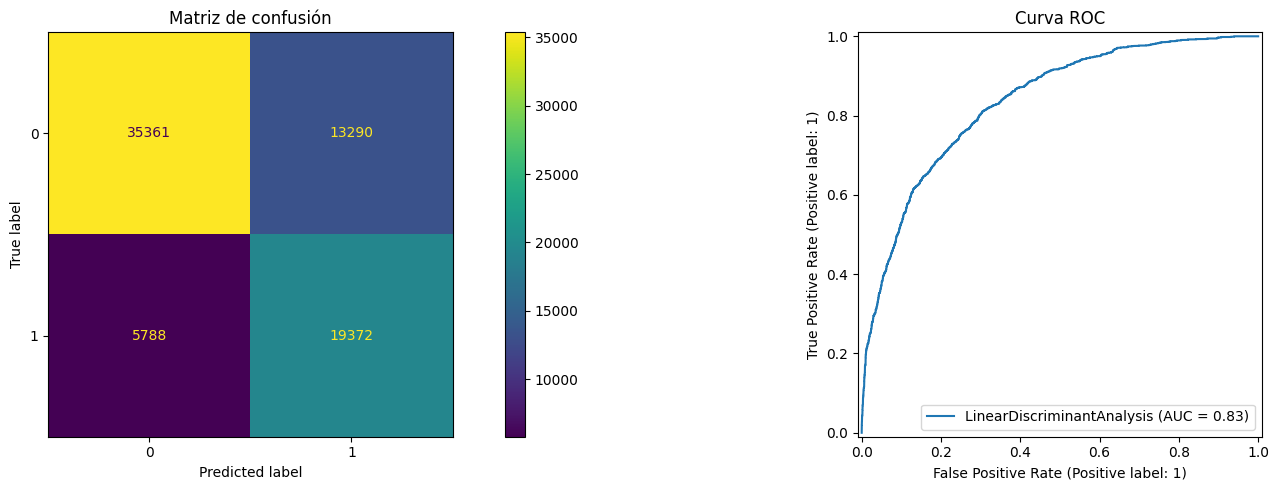

In [ ]:
confusion_matrix_and_roc_curve(lda2, X_test_2, y_test_2, pred_test_2)

El área bajo la curva ROC también mejora, pasó de 0.76 a 0.83.

### **Discriminante logístico**

Hacemos las mismas pruebas que recién pero ahora utilizando un discriminante logístico:

#### **Usando solamente la situación en el hogar**

In [ ]:
logr1 = LogisticRegression()
logr1.fit(X_train_1_balanced, y_train_1_balanced)

pred_test_1 = logr1.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1, pred_test_1, digits=4))
print(f"Precisión: {accuracy_score(y_test_1, pred_test_1):.4f}")

              precision    recall  f1-score   support

           0     0.8115    0.6699    0.7339     72976
           1     0.5227    0.6991    0.5982     37741

    accuracy                         0.6799    110717
   macro avg     0.6671    0.6845    0.6661    110717
weighted avg     0.7131    0.6799    0.6877    110717

Precisión: 0.6799


Los resultados obtenidos son prácticamente iguales a los del discriminante lineal.

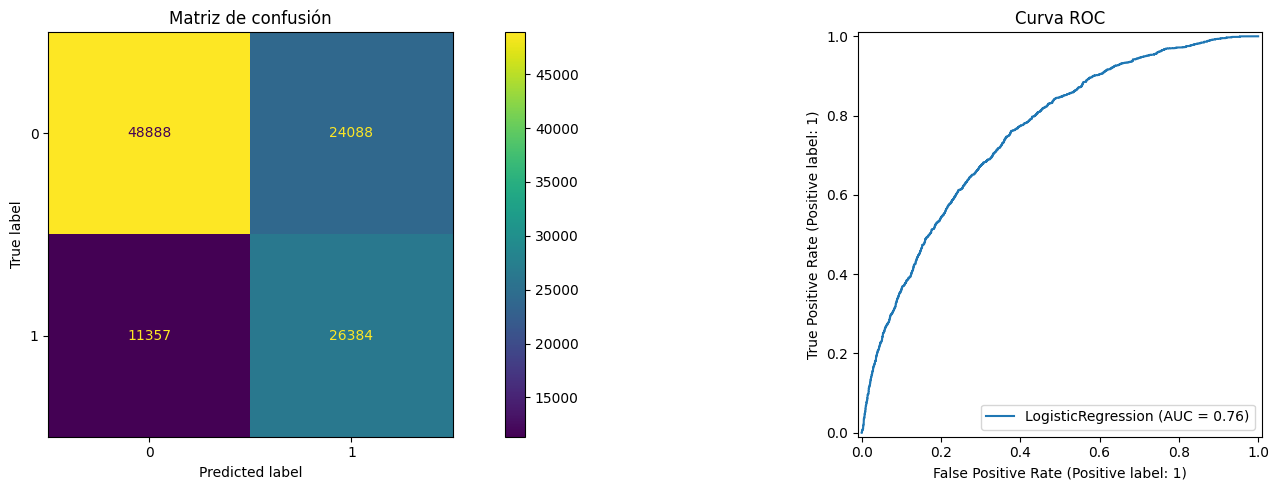

In [ ]:
confusion_matrix_and_roc_curve(logr1, X_test_1, y_test_1, pred_test_1)

#### **Agregamos más variables a la clasificación**
De nuevo, agreguemos más variables:

In [ ]:
logr2 = LogisticRegression()
logr2.fit(X_train_2_balanced, y_train_2_balanced)

pred_test_2 = logr2.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2, pred_test_2, digits=4))
print(f"Precisión: {accuracy_score(y_test_2, pred_test_2):.4f}")

              precision    recall  f1-score   support

           0     0.8587    0.7409    0.7954     48651
           1     0.6040    0.7642    0.6747     25160

    accuracy                         0.7488     73811
   macro avg     0.7313    0.7525    0.7351     73811
weighted avg     0.7719    0.7488    0.7543     73811

Precisión: 0.7488


Nuevamente, los resultados son muy parecidos a los obtenidos con el discriminante lineal.

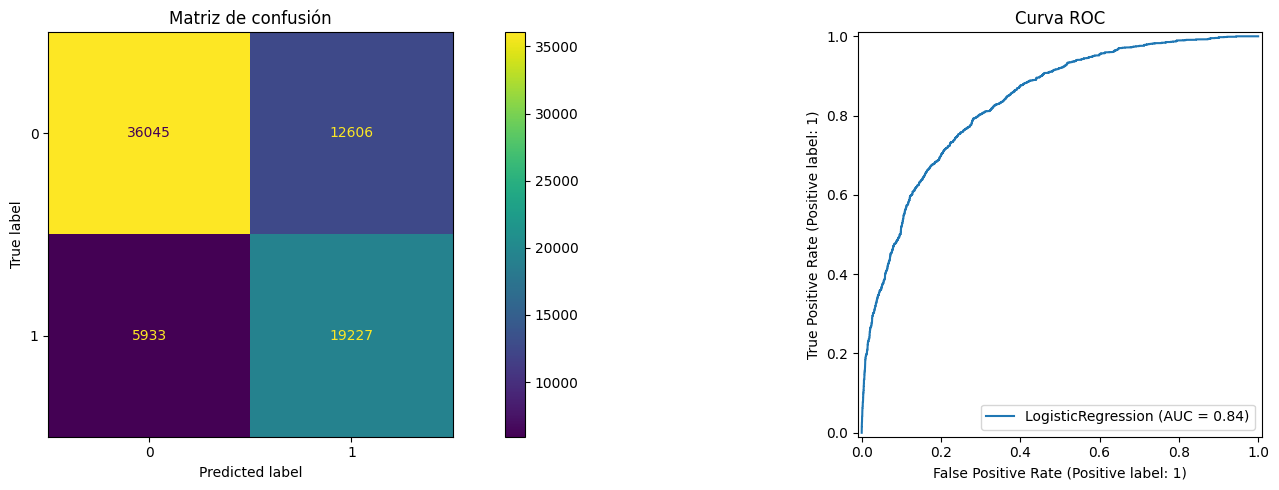

In [ ]:
confusion_matrix_and_roc_curve(logr2, X_test_2, y_test_2, pred_test_2)

### **Apreciaciones finales del primer acercamiento a la predicción**

- Los modelos que obtuvimos nos pueden servir para hacer identificar bastante bien a los alumnos que potencialmente desaprobarían: obtuvimos en la clase 0 una precisión del 85% y un recall del 74%.

- Si bien agregar variables a los modelos los mejoraron, esta mejora no fue muy significativa. Esto nos indica que las variables que usamos para las primeras clasificaciones (situación en el hogar: `ESCS`, `HISEI`, `CULTPOSS`) tienen un gran peso a la hora de decidir si un alumno va a aprobar o no, situación que ya venimos viendo en todos nuestros análisis.

- Los resultados con discriminante lineal y logístico son prácticamente iguales.

# **Conclusiones**
### **Sobre la base de datos PISA**

La base de datos PISA está ordenada, aunque los archivos de codificación pueden ser algo engorrosos.

En varias variables, hay un alto porcentaje de valores perdidos, por lo que decidimos no tenerlas en cuenta. También decidimos prescindir de las observaciones que tuvieron algún valor perdido en las columnas restantes.

### **Primera entrega**

En la primera parte del estudio, varios análisis exploratorios y confirmatorios demostraron que muchas de las características de los alumnos y las escuelas influyen en los resultados en las pruebas PISA.

### **Segunda entrega**

En esta segunda parte, pudimos profundizar esta primera conclusión con modelos más robustos, pudiendo extraer resultados útiles en la práctica.

En primer lugar, confirmamos que la situación en el hogar y en la escuela tienen un impacto en el resultado. Mientras mejor sea esta situación, mejor serán las notas de los alumnos.

Sin emabrgo, pensando en la restricción presupuestaria que enfrenta cualquier gobierno, nos pareció más interesante pensar en la situación en el hogar. Los clusters mostraron que los alumnos con situaciones hogareñas opuestas, tienen resultados también marcadamente opuestos.

Teniendo en cuenta esto, procedimos a desarrollar modelos predictivos de clasificación sobre si un alumno va a aprobar o no, para guiar estas políticas de manera más eficiente. Las métricas de desempeño de estos modelos nos indican que pueden ser útiles para la clasificación.